In [20]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sb.set()

In [21]:
stockCSV = pd.read_csv('stockdata.csv')

In [22]:
stockCSV['Foodsum'] = stockCSV['KE=F']+stockCSV['ZR=F']

In [23]:
stockCSV = stockCSV.dropna(how='any') #Cleaning Null Values

In [24]:
stockCSV['Foodsum'] = stockCSV['Foodsum'].round(3)
stockCSV['CL=F'] = stockCSV['CL=F'].round(3)
stockCSV['NG=F'] = stockCSV['NG=F'].round(3)
stockCSV['SQM'] = stockCSV['SQM'].round(3)

stockCSV['GC=F'] = stockCSV['GC=F'].round(3)
stockCSV['ZF=F'] = stockCSV['ZF=F'].round(3)
stockCSV['BRK-A'] = stockCSV['BRK-A'].round(3)
stockCSV['TSLA'] = stockCSV['TSLA'].round(3)

In [25]:
Wheat = pd.DataFrame(stockCSV['KE=F'])
Rice = pd.DataFrame(stockCSV['ZR=F'])
Food = pd.DataFrame(stockCSV['Foodsum'])

Crude = pd.DataFrame(stockCSV['CL=F'])
Nat = pd.DataFrame(stockCSV['NG=F'])

Fert = pd.DataFrame(stockCSV['SQM'])

Gold = pd.DataFrame(stockCSV['GC=F'])
Bonds = pd.DataFrame(stockCSV['ZF=F'])

Berkshire = pd.DataFrame(stockCSV['BRK-A'])
Tesla = pd.DataFrame(stockCSV['TSLA'])

Date = pd.DataFrame(stockCSV['Date'])

# Exploratory Data Analysis (2)
### via Granger Causality Test

The Granger Causalitytest is used to test for "Granger Causality" or the degree to which two time series datasets are temporally related.

A simple linear regression would not produce a reliable correlation value as changes in one time series may not immediately affect the other. The P-value obtained from a Granger Causality test allows us to check the validiaty of the Null Hypothesis. The smaller the P-value, the more likely it is that the NULL hypothesis can be rejected.

( NULL Hypothesis: There is NO correlation between the datasets. )

Before we apply the Granger causality test, we would need to check for stationarity. 
Stationarity is the property of the time series data set to be  


In [26]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

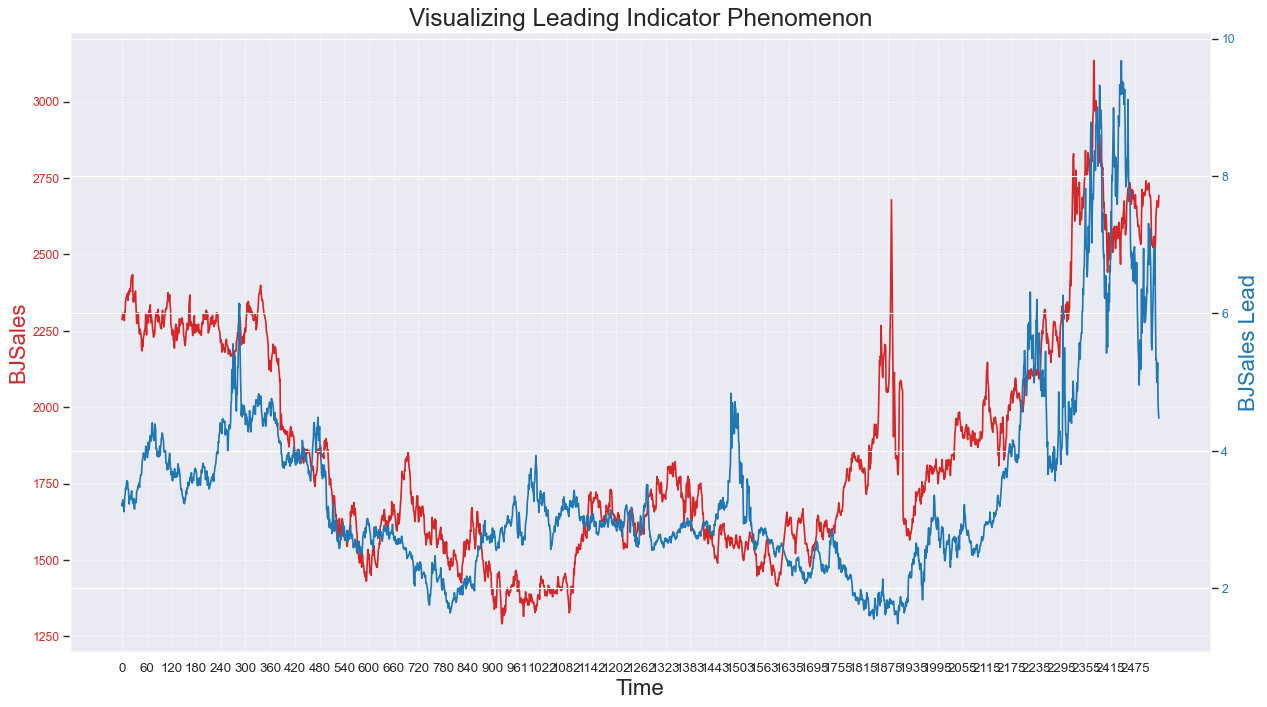

In [27]:
x = stockCSV.index
y1 = stockCSV['Foodsum']
y2 = stockCSV['NG=F']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Time', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('BJSales', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("BJSales Lead", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Visualizing Leading Indicator Phenomenon", fontsize=22)
fig.tight_layout()
plt.show()

In [28]:
pip install numpy scipy patsy pandas

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install statsmodels==0.14.1

  Obtaining dependency information for statsmodels==0.14.1 from https://files.pythonhosted.org/packages/9a/b2/13833f94076dcc2709137fee92157ef5a0099a11ddff4f4b7cb301b35357/statsmodels-0.14.1-cp311-cp311-win_amd64.whl.metadata
  Using cached statsmodels-0.14.1-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
Using cached statsmodels-0.14.1-cp311-cp311-win_amd64.whl (9.9 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.2
    Uninstalling statsmodels-0.14.2:
      Successfully uninstalled statsmodels-0.14.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\User\\anaconda3\\Lib\\site-packages\\~-atsmodels\\tsa\\_innovations.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [30]:
from statsmodels.tsa.stattools import grangercausalitytests

In [31]:
maxlag = 12
test   = 'ssr_chi2test'

In [32]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [33]:
combined_df = pd.concat([y1, y2], axis=1)

grangers_causation_matrix(combined_df, variables = combined_df.columns)

,Foodsum_x,NG=F_x
Foodsum_y,1.000,0.0003
NG=F_y,0.005,1.0000


In [34]:
def granger_causality(x,y1,y2):
        
        # Plot Line1 (Left Y Axis)
        fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
        ax1.plot(x, y1, color='tab:red')

        # Plot Line2 (Right Y Axis)
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        ax2.plot(x, y2, color='tab:blue')

        # Decorations
        # ax1 (left Y axis)
        ax1.set_xlabel('Time', fontsize=20)
        ax1.tick_params(axis='x', rotation=0, labelsize=12)
        ax1.set_ylabel('BJSales', color='tab:red', fontsize=20)
        ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
        ax1.grid(alpha=.4)

        # ax2 (right Y axis)
        ax2.set_ylabel("BJSales Lead", color='tab:blue', fontsize=20)
        ax2.tick_params(axis='y', labelcolor='tab:blue')
        ax2.set_xticks(np.arange(0, len(x), 60))
        ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
        ax2.set_title("Visualizing Leading Indicator Phenomenon", fontsize=22)
        fig.tight_layout()
        plt.show()
        

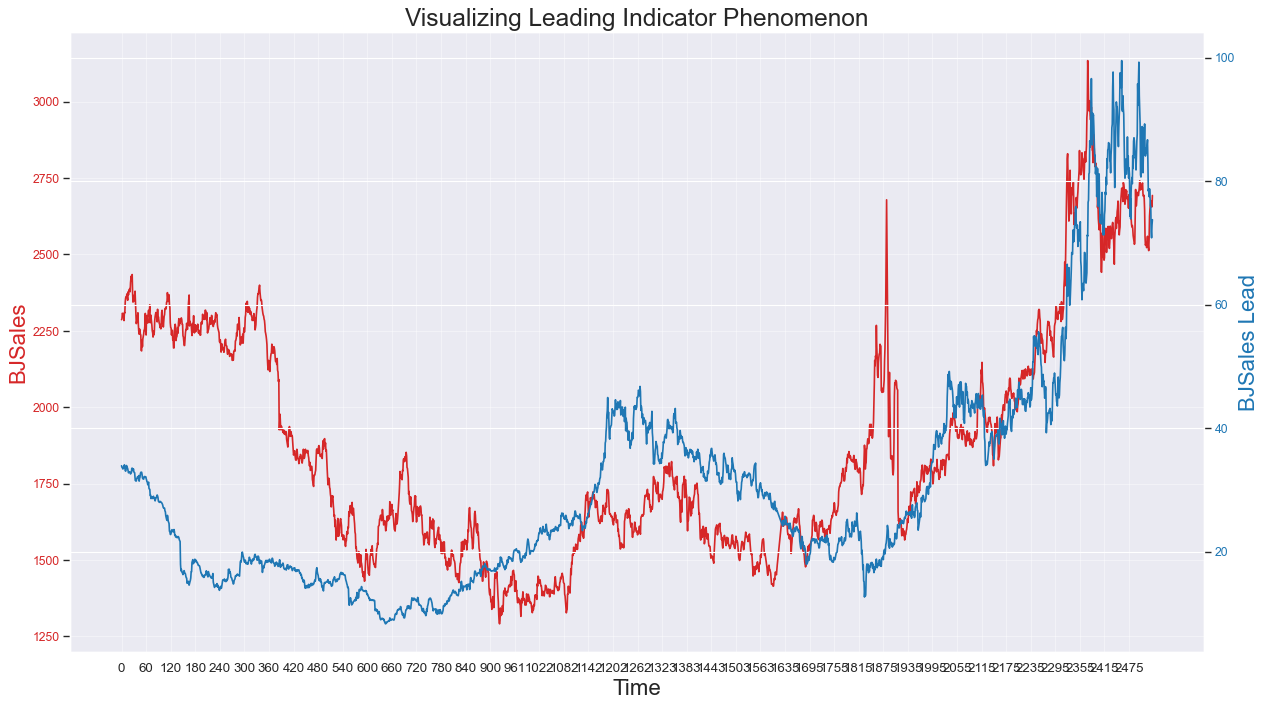

,Foodsum_x,SQM_x
Foodsum_y,1.0000,0.0008
SQM_y,0.0592,1.0000


In [35]:

granger_causality(stockCSV.index, stockCSV['Foodsum'], stockCSV['SQM'])
maxlag = 12
test   = 'ssr_chi2test'
y1= stockCSV['Foodsum'] 
y2= stockCSV['SQM']
combined_df = pd.concat([y1, y2], axis=1)
grangers_causation_matrix(combined_df, variables = combined_df.columns)

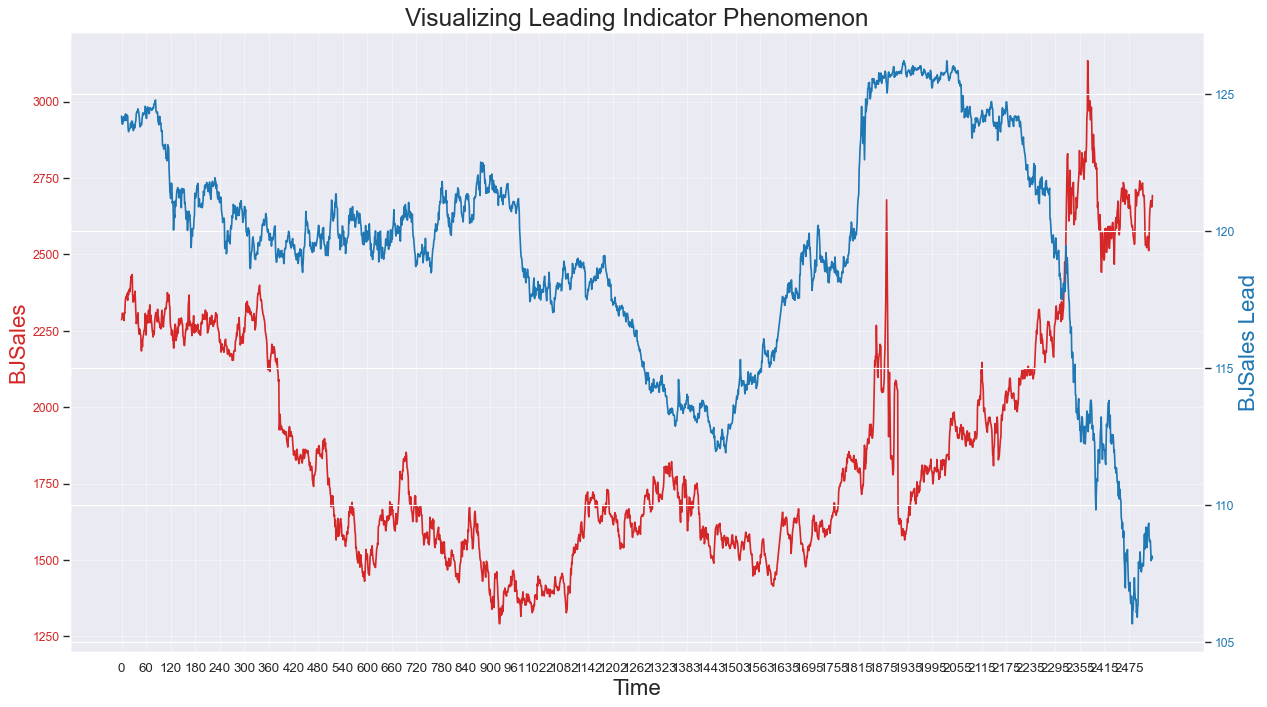

,Foodsum_x,ZF=F_x
Foodsum_y,1.0000,0.2642
ZF=F_y,0.0029,1.0000


In [36]:
granger_causality(stockCSV.index, stockCSV['Foodsum'], stockCSV['ZF=F'])
maxlag = 12
test   = 'ssr_chi2test'
y1= stockCSV['Foodsum'] 
y2= stockCSV['ZF=F']
combined_df = pd.concat([y1, y2], axis=1)
grangers_causation_matrix(combined_df, variables = combined_df.columns)

We can thus see that Bonds are not that good at being used as a predictor for "Foodsum" as the chance they may not be temporally related is quite high.

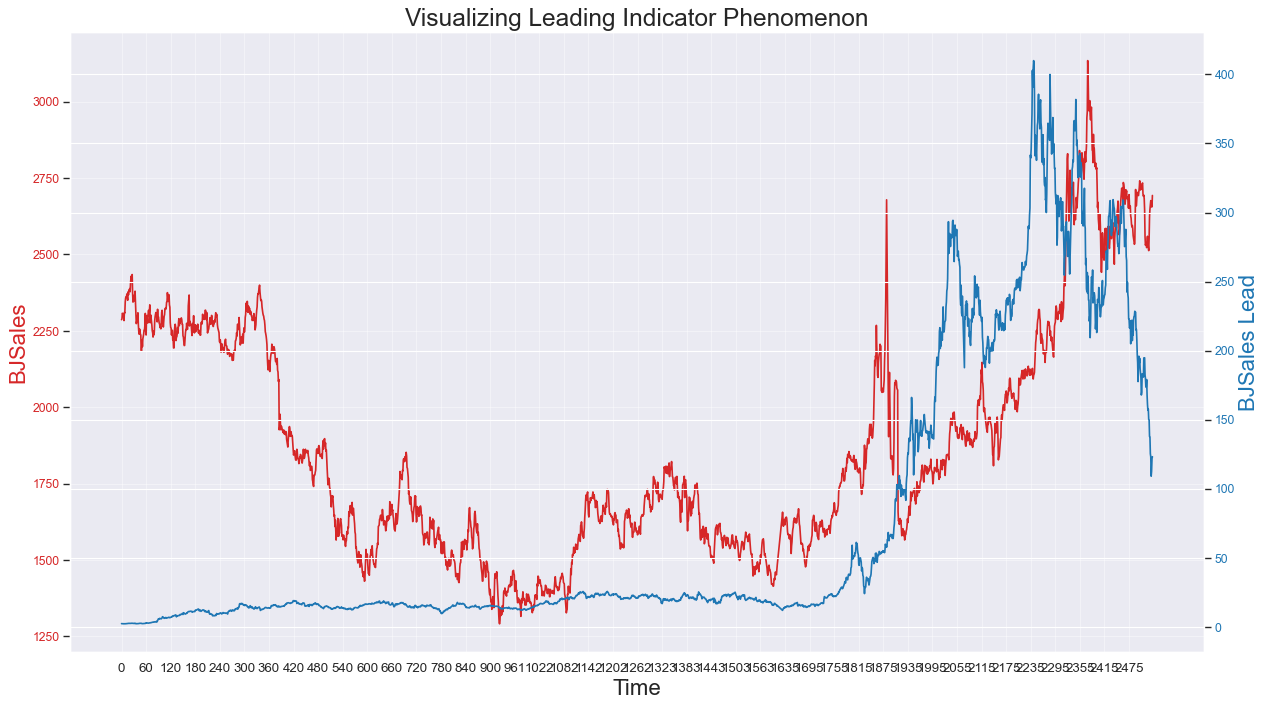

,Foodsum_x,TSLA_x
Foodsum_y,1.0000,0.0
TSLA_y,0.2294,1.0


In [37]:
granger_causality(stockCSV.index, stockCSV['Foodsum'], stockCSV['TSLA'])
maxlag = 12
test   = 'ssr_chi2test'
y1= stockCSV['Foodsum'] 
y2= stockCSV['TSLA']
combined_df = pd.concat([y1, y2], axis=1)
grangers_causation_matrix(combined_df, variables = combined_df.columns)